<div style='text-align: center; padding: 30px'>
  <h1><strong>Preparación de los Datos y Análisis de Datos</strong></h1>
  <h3><strong>Heri</strong></h1>
</div>

**Objetivo**

Realizar el proceso de preparación de datos del modelo CRISP-DM y aplicar un proceso de análisis de datos.

**Instrucciones**

1. Elige un tema de análisis basado en los datos de ENSANUT 2023.
2. Diseña una ruta de trabajo para realizar el análisis propuesto (20%).
3. Realiza el análisis de datos y presenta tus resultados (80%).

**Nota**  

La preparación de datos debe incluir:
- Proceso de limpieza de datos.
- Estandarización, normalización o transformación de datos.
- Imputación de valores faltantes usando `KKImputer` o `SimpleImputer` de `sklearn`.

El análisis de datos debe incluir:  
- Árbol de decisión.
- Prueba de chi2.
- Histogramas univariados o bivariados con KDE.
- Visualización de datos (por lo menos 2 gráficas diferentes).


**Entregables**  

- Ruta de trabajo (máximo 2 cuartillas). Entregar antes del 11 de marzo a las 23:59 horas.
- Reporte del proceso de preparación de datos explicando el proceso de limpieza y transformación de datos. Debes incluir aquellas variables donde se hayan identificado valores faltantes y el tipo de valor faltante (MCAR; NMCAR, MAR).
- Una presentación de 10 minutos explicando los resultados del análisis (19 de marzo).

In [236]:
import pandas as pd
import json

Era mucho texto y lo puse bonito

# **Data**

no necesitamos todas las variables, solo las que vamos a usar

•	Edad de la persona del integrante de hogar: H0303  
•	Parentesco del integrante del hogar: H0305  
•	Lugar de nacimiento del integrante de hogar: H0306  
•	Habla alguna lengua indígena y/o español el integrante de hogar: H0311, H0312  
•	Nivel y grado de escolaridad del integrante de hogar: H0317A y H0317G.  
•	Alfabetismo del integrante de hogar: H0318  
•	Ingresos en el hogar: H0327.  

•	Sobrepeso u obesidad. Variable “A0104”.  
•	Dieta alta en azúcares y carbohidratos refinados. Solo se le pregunto a personas que padecían alguna enfermedad.  
•	Sedentarismo. Se puede conocer a través de la pregunta “A0107” Si ganaron o perdieron peso.  
•	Antecedentes familiares de diabetes tipo 2. “A0701P”, “A0701M”, “A0701PH”.	  
•	Hipertensión o colesterol alto. Si contestaron que no tienen diabetes no hay registro.  
•	Síndrome de ovario poliquístico (en mujeres). No hay información.  

In [237]:
pd.set_option('display.max_columns', None)

In [238]:
mergefull = pd.read_csv('mergefull.csv')
diabetesyocupacion = mergefull[['h0303', 'h0305', 'h0306', 'h0307', 'h0308','h0311', 'h0312', 'h0317a', 'h0317g', 'h0318', 'h0319', 'h0327', 'h0321', 'h0322', 'h0323', 'h0324',    'a0104', 'a0107', 'a0701p', 'a0701m', 'a0701h', 'a0301a', 'a0301']]
diabetesyocupacion.to_csv('Diabetes-y-Ocupacion.csv', index=False)

C:\Users\herie\AppData\Local\Temp\ipykernel_10896\1962565278.py:1: DtypeWarning: Columns (32,33,34,35,36,37,38,40,41,42,44,45,46,48,49,50,51,52,56,57,58,130,186,946,955,956,957,1013,1193,1224) have mixed types. Specify dtype option on import or set low_memory=False.
  mergefull = pd.read_csv('mergefull.csv')


In [239]:
data = pd.read_csv('Diabetes-y-Ocupacion.csv')

### **Nombres de los plots**

In [240]:
# Leer el archivo JSON
with open('dictcat.json', 'r') as fp:
    dictcat = json.load(fp)

### **Etiquetas para los histogramas**

In [241]:
# Leer el archivo JSON
with open('diccionario_etiquetas.json', 'r') as file:
    diccionario_etiquetas = json.load(file)

# **Plots**

In [242]:
from cute_plots import * # laboratorio pasado

In [243]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [244]:
plot = CutePlots(data, dictcat, diccionario_etiquetas, 'dark')

In [245]:
    # def histograma(self, column, colnum, kde=False, bins='auto', numerito=False, kde_color=None):
    #     return histograma(column, self.mergefull, self.dictcat, self.palette, colnum, kde, bins, numerito, kde_color)

# **Laboratorio**

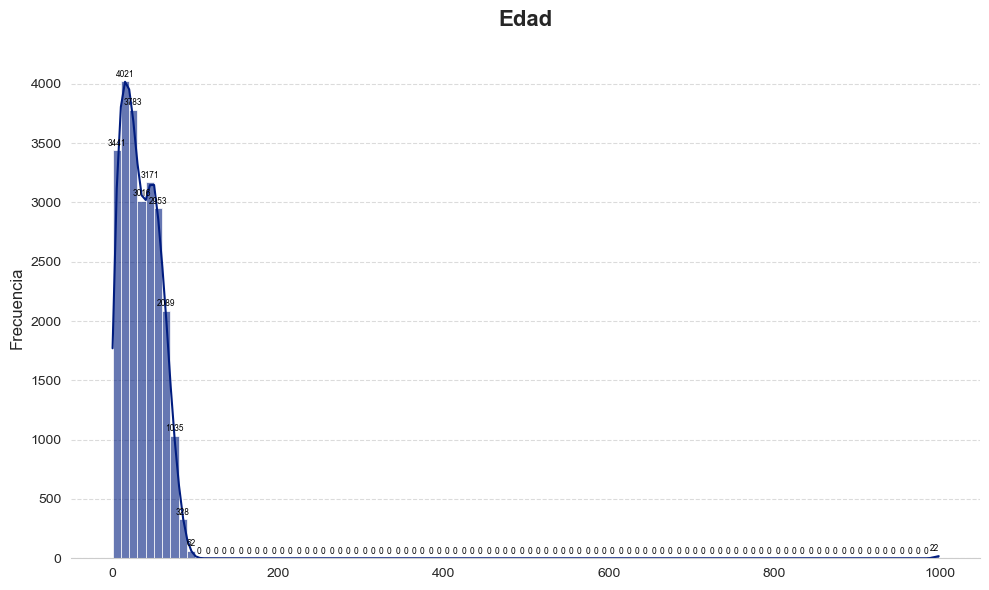

In [246]:
plot.histograma('h0303', 0, kde=True, bins=100, numerito=True)

In [247]:
# drop column if h0303 is more than 115
data = data.drop(data[data['h0303'] > 115].index)
plot = CutePlots(data, dictcat, diccionario_etiquetas, 'dark')

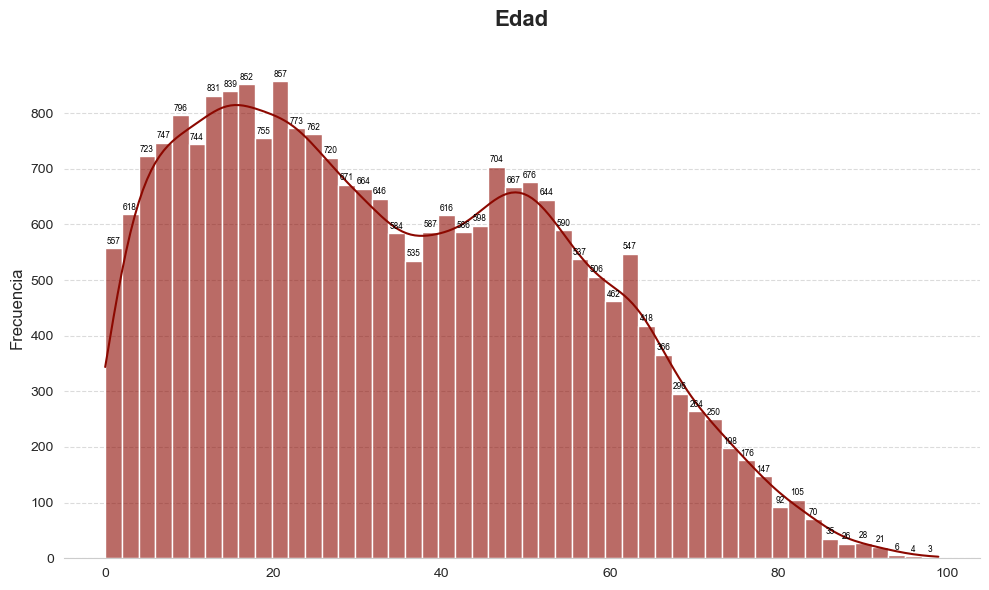

In [248]:
plot.histograma('h0303', 3, kde=True, bins=50, numerito=True)

# **Ocupación (árbol)**

In [249]:
import numpy as np

In [250]:
data

,h0303,h0305,h0306,h0307,h0308,h0311,h0312,h0317a,h0317g,h0318,h0319,h0327,h0321,h0322,h0323,h0324,a0104,a0107,a0701p,a0701m,a0701h,a0301a,a0301
0,47,1,2,3,2,2,,3,3,,6,3,1,,,1,8,1,2,1,2,2,3
1,41,2,1,2,3,2,,2,6,1,6,3,2,6,2,,8,1,2,1,2,2,3
2,20,3,1,1,1,2,,10,3,,7,3,2,6,3,,8,1,2,1,2,2,3
3,17,3,1,1,1,2,,4,2,,7,3,1,,,1,8,1,2,1,2,2,3
4,11,3,1,1,1,2,,2,6,1,,3,,,,,8,1,2,1,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,17,3,1,1,2,2,,4,3,,7,2,2,6,3,,6,3,2,2,2,2,3
23917,15,3,1,1,2,2,,4,1,,7,2,2,6,3,,6,3,2,2,2,2,3
23918,40,1,1,2,3,2,,10,4,,2,8,1,,,1,6,1,2,2,2,2,3
23919,13,3,2,2,1,2,,3,2,,7,8,2,6,3,,6,1,2,2,2,2,3


In [251]:
data['h0307'].apply(lambda x: np.nan if x == 99 else x)

0        3
1        2
2        1
3        1
4        1
        ..
23916    1
23917    1
23918    2
23919    2
23920    2
Name: h0307, Length: 23899, dtype: int64

## **Transformación de los Datos**

In [252]:
ocupacion = data[['h0303', 'h0305', 'h0306', 'h0307', 'h0308','h0311', 'h0312', 'h0317a', 'h0317g', 'h0318', 'h0327', 'h0321', 'h0322', 'h0323', 'h0324']]

In [253]:
# count the number of NaN values in each column

# !!! NO LO PODEMOS PASAR A NUMERICO PORQUE LOS PLOTS DEJAN DE FUNCIONAR !!!
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303         0
h0305         0
h0306         0
h0307         0
h0308         0
h0311       854
h0312     23212
h0317a      854
h0317g     2060
h0318     16050
h0327         0
h0321      4185
h0322     15156
h0323     15613
h0324     12471
dtype: int64


In [254]:
# we will assume that if they didnt answer the question, they dont speak indigena
# it is more likely that they dont speak indigena than that they do
ocupacion.loc[:, 'h0311'] = ocupacion['h0311'].replace(' ', '2')


# if they dont speak indigena, they speak spanish
ocupacion.loc[ocupacion['h0311'] == '2', 'h0312'] = '1'

# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())


h0303         0
h0305         0
h0306         0
h0307         0
h0308         0
h0311         0
h0312         0
h0317a      854
h0317g     2060
h0318     16050
h0327         0
h0321      4185
h0322     15156
h0323     15613
h0324     12471
dtype: int64


In [255]:
# if they didnt answer the question, they know how to read and write
# (the ones that didnt answer went to school, and skipped the question)
ocupacion['h0318'] = ocupacion['h0318'].replace(' ', '1')


# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303         0
h0305         0
h0306         0
h0307         0
h0308         0
h0311         0
h0312         0
h0317a      854
h0317g     2060
h0318         0
h0327         0
h0321      4185
h0322     15156
h0323     15613
h0324     12471
dtype: int64


C:\Users\herie\AppData\Local\Temp\ipykernel_10896\4023124364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion['h0318'] = ocupacion['h0318'].replace(' ', '1')


In [256]:
# Son los que estan como desconocidos porque contestaron que hacian en la H02323
ocupacion.loc[ocupacion['h0323'] == '1', 'h0324'] = 'Busco Trabajo'
ocupacion.loc[ocupacion['h0323'] == '2', 'h0324'] = 'Quehaceres del hogar'
ocupacion.loc[ocupacion['h0323'] == '3', 'h0324'] = 'Estudiante'
ocupacion.loc[ocupacion['h0323'] == '4', 'h0324'] = 'Jubilado o pensionado'
ocupacion.loc[ocupacion['h0323'] == '5', 'h0324'] = 'Incapacitado'
ocupacion.loc[ocupacion['h0323'] == '6', 'h0324'] = 'Otra situación'

# Pasamos de numerico a categorico
ocupacion.loc[ocupacion['h0324'] == '1', 'h0324'] = 'Empleado'
ocupacion.loc[ocupacion['h0324'] == '2', 'h0324'] = 'Obrero'
ocupacion.loc[ocupacion['h0324'] == '3', 'h0324'] = 'Jornalero o peón'
ocupacion.loc[ocupacion['h0324'] == '4', 'h0324'] = 'Trabajador por su cuenta'
ocupacion.loc[ocupacion['h0324'] == '5', 'h0324'] = 'Patrón o empleador'
ocupacion.loc[ocupacion['h0324'] == '6', 'h0324'] = 'Trabajador sin pago'
ocupacion.loc[ocupacion['h0324'] == '7', 'h0324'] = 'Otra situación'

# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303         0
h0305         0
h0306         0
h0307         0
h0308         0
h0311         0
h0312         0
h0317a      854
h0317g     2060
h0318         0
h0327         0
h0321      4185
h0322     15156
h0323     15613
h0324      4185
dtype: int64


In [257]:
# because we only care about the occupation, we will drop the other columns
ocupacion.drop(columns=['h0321', 'h0322', 'h0323'], inplace=True)

C:\Users\herie\AppData\Local\Temp\ipykernel_10896\3561635030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion.drop(columns=['h0321', 'h0322', 'h0323'], inplace=True)


In [258]:
# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303        0
h0305        0
h0306        0
h0307        0
h0308        0
h0311        0
h0312        0
h0317a     854
h0317g    2060
h0318        0
h0327        0
h0324     4185
dtype: int64


# **A LOT OF NANS IN H0317A, WE WILL PREDICT IT**

# **DECISION TREE TO ESCOLARIDAD**

Because it has a lot of categorical values

In [259]:
escolaridad = ocupacion[['h0303', 'h0305', 'h0306', 'h0307', 'h0308', 'h0311', 'h0312', 'h0318', 'h0327', 'h0317a']]

In [260]:
escolaridad

,h0303,h0305,h0306,h0307,h0308,h0311,h0312,h0318,h0327,h0317a
0,47,1,2,3,2,2,1,1,3,3
1,41,2,1,2,3,2,1,1,3,2
2,20,3,1,1,1,2,1,1,3,10
3,17,3,1,1,1,2,1,1,3,4
4,11,3,1,1,1,2,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...
23916,17,3,1,1,2,2,1,1,2,4
23917,15,3,1,1,2,2,1,1,2,4
23918,40,1,1,2,3,2,1,1,8,10
23919,13,3,2,2,1,2,1,1,8,3


In [261]:
print(escolaridad.apply(lambda x: x == ' ').sum())

h0303       0
h0305       0
h0306       0
h0307       0
h0308       0
h0311       0
h0312       0
h0318       0
h0327       0
h0317a    854
dtype: int64


In [262]:
# decition tree to predict h0317a
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# escolaridad_train are the rows that are not ' ' in h0317a
escolaridad_train = escolaridad[escolaridad['h0317a'] != ' ']

x_train = escolaridad_train.drop('h0317a', axis=1)
y_train = escolaridad_train['h0317a']

escolaridad_pred = escolaridad[escolaridad['h0317a'] == ' ']

x_pred = escolaridad_pred.drop('h0317a', axis=1)
y_pred = escolaridad_pred['h0317a']

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_pred)

# count the number of NaN values in each column
# replace the predicted values in the original dataframe
ocupacion.loc[ocupacion['h0317a'] == ' ', 'h0317a'] = y_pred

In [264]:
# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303        0
h0305        0
h0306        0
h0307        0
h0308        0
h0311        0
h0312        0
h0317a       0
h0317g    2060
h0318        0
h0327        0
h0324     4185
dtype: int64


# **$\text{yupi}$**

In [270]:
edad_inicio = {
    '0': 0,   # Ninguno
    '1': 3,   # Preescolar (inicia alrededor de los 3 años)
    '2': 6,   # Primaria (inicia alrededor de los 6 años)
    '3': 12,  # Secundaria (inicia alrededor de los 12 años)
    '4': 15,  # Preparatoria, bachillerato (inicia alrededor de los 15 años)
    '5': 18,  # Normal básica (formación para docentes con preparatoria terminada)
    '6': 12,  # Estudios técnicos o comerciales con primaria terminada
    '7': 15,  # Estudios técnicos o comerciales con secundaria terminada
    '8': 18,  # Estudios técnicos o comerciales con preparatoria terminada
    '9': 19,  # Normal licenciatura (docentes con grado de licenciatura, después de prepa)
    '10': 18, # Licenciatura o profesional (suele iniciar alrededor de los 18 años)
    '11': 23, # Maestría (después de licenciatura, normalmente inicia a los 23)
    '12': 25  # Doctorado (suele iniciar a los 25, después de la maestría)
}

ocupacion.loc[:, 'h0317aint'] = ocupacion['h0317a'].map(edad_inicio)

## h0317 will be a new variable that will be the sum of h0317a and h0317g
## h0317 is the total years of study (on awerage)

In [271]:
# create a new column with the integer version of h0317g
ocupacion.loc[:, 'h0317gint'] = pd.to_numeric(ocupacion['h0317g'], errors='coerce')

In [ ]:
mediana = ocupacion.groupby('h0317aint')['h0317gint'].median()
mediana.replace(np.nan, 0, inplace=True)
mediana

h0317aint
0     0.0
3     2.0
6     5.0
12    3.0
15    3.0
18    4.0
19    3.0
23    2.0
25    3.0
Name: h0317gint, dtype: float64

In [306]:
# fill the NaN values in h0317gint with the median
ocupacion.loc[:, 'h0317gint'] = ocupacion['h0317gint'].fillna(ocupacion['h0317aint'].map(mediana))

In [309]:
# h0317 will be the time that the person studied
ocupacion.loc[:, 'h0317'] = ocupacion['h0317aint'] + ocupacion['h0317gint']

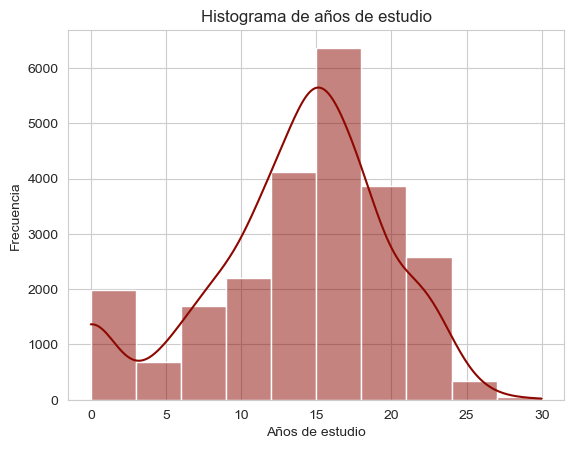

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ocupacion['h0317'], bins=10, kde=True, color=sns.color_palette('dark')[3], kde_kws={'bw_adjust': 2.2})
plt.xlabel('Años de estudio')
plt.ylabel('Frecuencia')
plt.title('Histograma de años de estudio')
plt.savefig('histograma-anos-de-estudio.svg')
plt.show()


In [325]:
# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303           0
h0305           0
h0306           0
h0307           0
h0308           0
h0311           0
h0312           0
h0317a          0
h0317g       2060
h0318           0
h0327           0
h0324        4185
h0317aint       0
h0317gint       0
h0317           0
dtype: int64


# **KNN TO ESCOLARIDAD**

### **ENTRENAMIENTO**

In [ ]:
# esc de escolaridad
esc = ocupacion[['h0303', 'h0305', 'h0306', 'h0307', 'h0308', 'h0311', 'h0312', 'h0317', 'h0318', 'h0327', 'h0324']]


esc['h0303'] = (ocupacion['h0303'] - ocupacion['h0303'].mean()) / ocupacion['h0303'].std()  # z-score for edad
esc = pd.get_dummies(esc, columns=['h0305'], prefix='h0305')    # one hot encoding paretnesco
esc = pd.get_dummies(esc, columns=['h0306'], prefix='h0306')    # one hot encoding nacimiento
esc = pd.get_dummies(esc, columns=['h0307'], prefix='h0307')    # one hot encoding madre
esc = pd.get_dummies(esc, columns=['h0308'], prefix='h0308')    # one hot encoding padre
esc = pd.get_dummies(esc, columns=['h0311'], prefix='h0311')    # one hot encoding lengua indigena
esc = pd.get_dummies(esc, columns=['h0312'], prefix='h0312')    # one hot encoding español
esc = pd.get_dummies(esc, columns=['h0318'], prefix='h0318')    # one hot encoding leer y escribir

# categorical to nominal for h0327
ingresos_map = {
    1: 3000,   # Promedio de 1–5,999
    2: 8000,   # Promedio de 6,000–9,999
    3: 12000,  # Promedio de 10,000–13,999
    4: 18000,  # Promedio de 14,000–21,999
    5: 25000,  # Aproximación para 22,000 o más
    6: 0,      # No perciben ingresos
    8: 3000,   # No quiso responder (imputar)
    9: 3000    # No sabe (imputar)
}

esc['h0327'] = ocupacion['h0327'].map(ingresos_map)

C:\Users\herie\AppData\Local\Temp\ipykernel_10896\691643413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esc['h0303'] = (ocupacion['h0303'] - ocupacion['h0303'].mean()) / ocupacion['h0303'].std()


### **TRAIN DATA**

In [ ]:
# if h0324 is ' ', drop the row
train_data = esc.drop(esc[esc['h0317a'] == ' '].index)
train_data

,h0303,h0327,h0317a,h0305_1,h0305_2,h0305_3,h0305_4,h0305_5,h0305_6,h0305_7,h0305_8,h0305_9,h0306_1,h0306_2,h0306_3,h0306_4,h0311_1,h0311_2,h0312_1,h0312_2,h0318_1,h0318_2
0,0.598776,12000,3,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False
1,0.320261,12000,2,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
2,-0.654542,12000,10,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
3,-0.793799,12000,4,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
4,-1.072314,12000,2,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,-0.793799,8000,4,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23917,-0.886638,8000,4,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23918,0.273842,3000,10,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23919,-0.979476,3000,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False


In [ ]:
# esc['h0317a'] to numeric
train_data['h0317a'] = train_data['h0317a'].astype(int)

In [ ]:
predict_data = esc[esc['h0317a'] == ' ']
predict_data

,h0303,h0327,h0317a,h0305_1,h0305_2,h0305_3,h0305_4,h0305_5,h0305_6,h0305_7,h0305_8,h0305_9,h0306_1,h0306_2,h0306_3,h0306_4,h0311_1,h0311_2,h0312_1,h0312_2,h0318_1,h0318_2
16,-1.536506,8000,,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
24,-1.536506,8000,,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
46,-1.582925,8000,,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
51,-1.536506,12000,,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
190,-1.490087,18000,,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23678,-1.582925,8000,,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23716,-1.582925,8000,,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23762,-1.490087,18000,,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23763,-1.490087,18000,,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False


In [ ]:
x_train = train_data.drop('h0317a', axis=1)
y_train = train_data['h0317a']

In [ ]:
x_train

,h0303,h0327,h0305_1,h0305_2,h0305_3,h0305_4,h0305_5,h0305_6,h0305_7,h0305_8,h0305_9,h0306_1,h0306_2,h0306_3,h0306_4,h0311_1,h0311_2,h0312_1,h0312_2,h0318_1,h0318_2
0,0.598776,12000,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False
1,0.320261,12000,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
2,-0.654542,12000,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
3,-0.793799,12000,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
4,-1.072314,12000,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,-0.793799,8000,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23917,-0.886638,8000,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23918,0.273842,3000,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23919,-0.979476,3000,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False


In [ ]:
y_train

0         3
1         2
2        10
3         4
4         2
         ..
23916     4
23917     4
23918    10
23919     3
23920    10
Name: h0317a, Length: 23045, dtype: int32

In [ ]:
x_predict = predict_data.drop('h0317a', axis=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Ajustar el modelo con los datos de entrenamiento
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_predict)

In [ ]:
# asignar los valores predichos a la columna h0324 de esc
esc.loc[esc['h0317a'] == ' ', 'h0317a'] = y_pred

In [ ]:
esc

,h0303,h0327,h0317a,h0305_1,h0305_2,h0305_3,h0305_4,h0305_5,h0305_6,h0305_7,h0305_8,h0305_9,h0306_1,h0306_2,h0306_3,h0306_4,h0311_1,h0311_2,h0312_1,h0312_2,h0318_1,h0318_2
0,0.598776,12000,3,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False
1,0.320261,12000,2,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
2,-0.654542,12000,10,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
3,-0.793799,12000,4,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
4,-1.072314,12000,2,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,-0.793799,8000,4,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23917,-0.886638,8000,4,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23918,0.273842,3000,10,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False
23919,-0.979476,3000,3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False


In [ ]:
# asignar los valores predichos a la columna h0324 de ocupacion
ocupacion.loc[ocupacion['h0317a'] == ' ', 'h0317a'] = y_pred

In [ ]:
ocupacion

,h0303,h0305,h0306,h0311,h0312,h0317a,h0317g,h0318,h0319,h0327,h0321,h0322,h0323,h0324,h0317aint,h0317gint,h0317
0,47,1,2,2,1,3,3,1,6,3,1,,,Empleado,15.0,3,18.0
1,41,2,1,2,1,2,6,1,6,3,2,6,2,Quehaceres del hogar,12.0,6,18.0
2,20,3,1,2,1,10,3,1,7,3,2,6,3,Estudiante,23.0,3,26.0
3,17,3,1,2,1,4,2,1,7,3,1,,,Empleado,18.0,2,20.0
4,11,3,1,2,1,2,6,1,,3,,,,,12.0,6,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,17,3,1,2,1,4,3,1,7,2,2,6,3,Estudiante,18.0,3,21.0
23917,15,3,1,2,1,4,1,1,7,2,2,6,3,Estudiante,18.0,1,19.0
23918,40,1,1,2,1,10,4,1,2,8,1,,,Empleado,23.0,4,27.0
23919,13,3,2,2,1,3,2,1,7,8,2,6,3,Estudiante,15.0,2,17.0


# Ya ocupacion

In [ ]:
# count the number of NaN values in each column
print(ocupacion.apply(lambda x: x == ' ').sum())

h0303            0
h0305            0
h0306            0
h0311            0
h0312            0
h0317a           0
h0317g           0
h0318            0
h0319         4185
h0327            0
h0321         4185
h0322        15156
h0323        15613
h0324         4185
h0317aint        0
h0317gint        0
h0317            0
dtype: int64
